In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('ProcessoSeletivo.csv')
display(data.head(5))
display(data.describe(include='all'))

,Id_aluno,Selecionado,Sexo,OrientacaoSexual,Idade,Raça-cor,Deficiência
0,6540,Sim,F,Bissexual,25,Amarela,Não possuo
1,16980,Sim,M,Heterossexual,24,Não informada,Não possuo
2,7135,Não,F,Prefiro não responder,22,Branca,Não possuo
3,687,Não,M,Homossexual,20,Preta,Não possuo
4,4387,Sim,F,Heterossexual,21,Branca,Não possuo


,Id_aluno,Selecionado,Sexo,OrientacaoSexual,Idade,Raça-cor,Deficiência
count,3000.00000,3000,3000,3000,3000.000000,3000,3000
unique,NaN,2,2,6,NaN,6,7
top,NaN,Sim,F,Heterossexual,NaN,Branca,Não possuo
freq,NaN,1927,1574,1851,NaN,1596,2886
mean,6606.28900,NaN,NaN,NaN,22.363333,NaN,NaN
std,4066.15574,NaN,NaN,NaN,4.512587,NaN,NaN
min,2.00000,NaN,NaN,NaN,17.000000,NaN,NaN
25%,3112.25000,NaN,NaN,NaN,20.000000,NaN,NaN
50%,6468.50000,NaN,NaN,NaN,21.000000,NaN,NaN
75%,9721.50000,NaN,NaN,NaN,24.000000,NaN,NaN


**Análise da Proporção de Gêneros no Processo Seletivo**

Primeiramente, separei os dados em duas categorias: participantes e aprovados. Criei gráficos de barras que ilustram o total de homens e mulheres tanto no total de participantes quanto entre os aprovados. Além disso, utilizei gráficos de setor para representar visualmente a proporção de cada gênero dentro desses dois grupos.

Os resultados revelaram que a proporção de homens e mulheres entre os participantes foi consistentemente refletida entre os aprovados. Em outras palavras, a proporção de homens e mulheres que participaram do processo seletivo foi aproximadamente a mesma na fase de aprovação. Este achado indica que a distribuição de gêneros foi mantida ao longo do processo, sugerindo que não houve viés de gênero na seleção final dos candidatos.

Essa análise proporciona uma visão clara e objetiva sobre a equidade de gênero no processo seletivo, evidenciando que a seleção dos candidatos aprovados foi representativa da composição inicial dos participantes. A uniformidade nas proporções entre os grupos de participantes e aprovados pode ser um indicativo positivo de que o processo seletivo foi conduzido de maneira justa e imparcial.

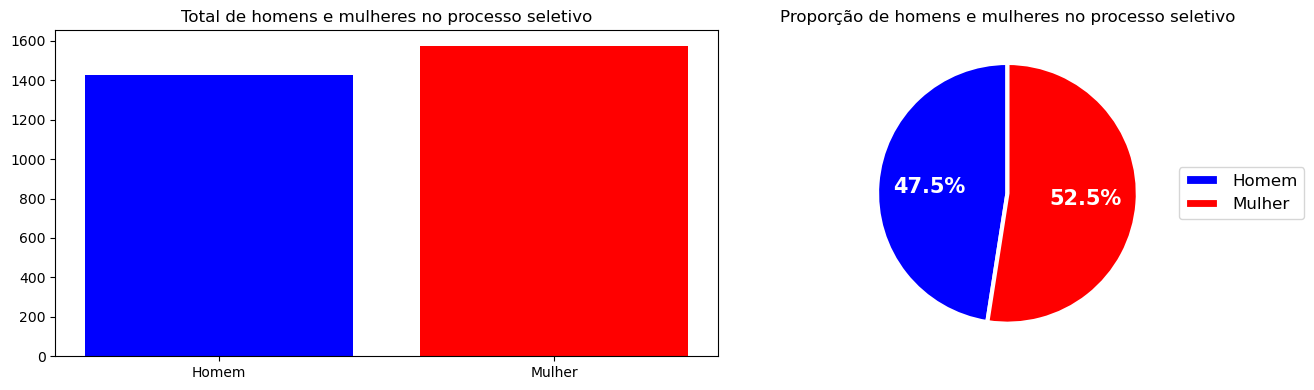

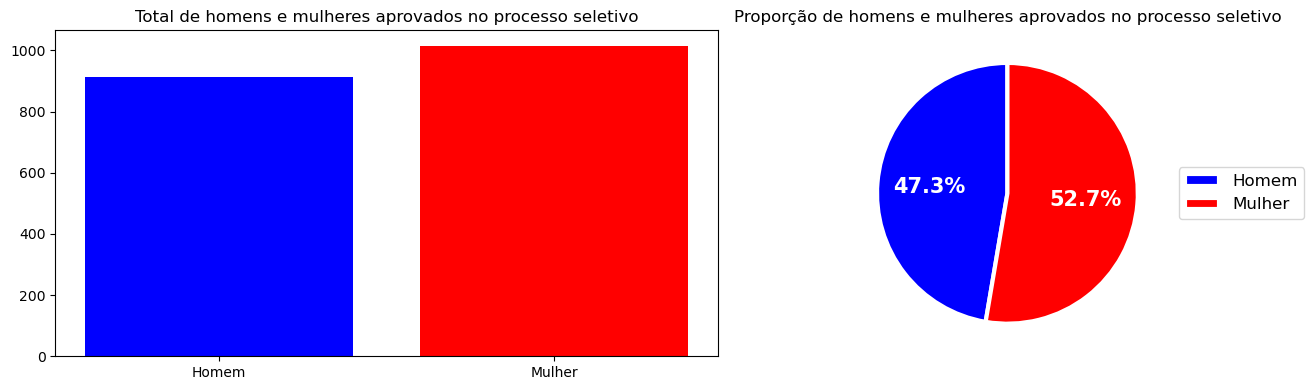

In [143]:
mulher_total = len(data.query("Sexo == 'F' "))
homem_total = len(data.query("Sexo == 'M' "))

x = ['Homem','Mulher']
y = [homem_total,mulher_total]

homem_aprovado = len(data.query("Sexo=='M' and Selecionado=='Sim'"))
mulher_aprovado = len(data.query("Sexo=='F' and Selecionado=='Sim'"))

k = [homem_aprovado,mulher_aprovado]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, y, color=['blue','red'])
ax[0].set_title('Total de homens e mulheres no processo seletivo')

wedges, texts, autotexts = ax[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de homens e mulheres no processo seletivo')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].bar(x, k, color=['blue','red'])
ax[0].set_title('Total de homens e mulheres aprovados no processo seletivo')

wedges, texts, autotexts = ax[1].pie(k, labels=x, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','red'])
ax[1].legend(wedges, x, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)    # Tamanho da fonte
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de homens e mulheres aprovados no processo seletivo')
plt.tight_layout()
plt.show()





**Análise da Proporção de raça no Processo Seletivo**

dict_keys(['Amarela', 'Branca', 'Indígena', 'Não informada', 'Parda', 'Preta'])


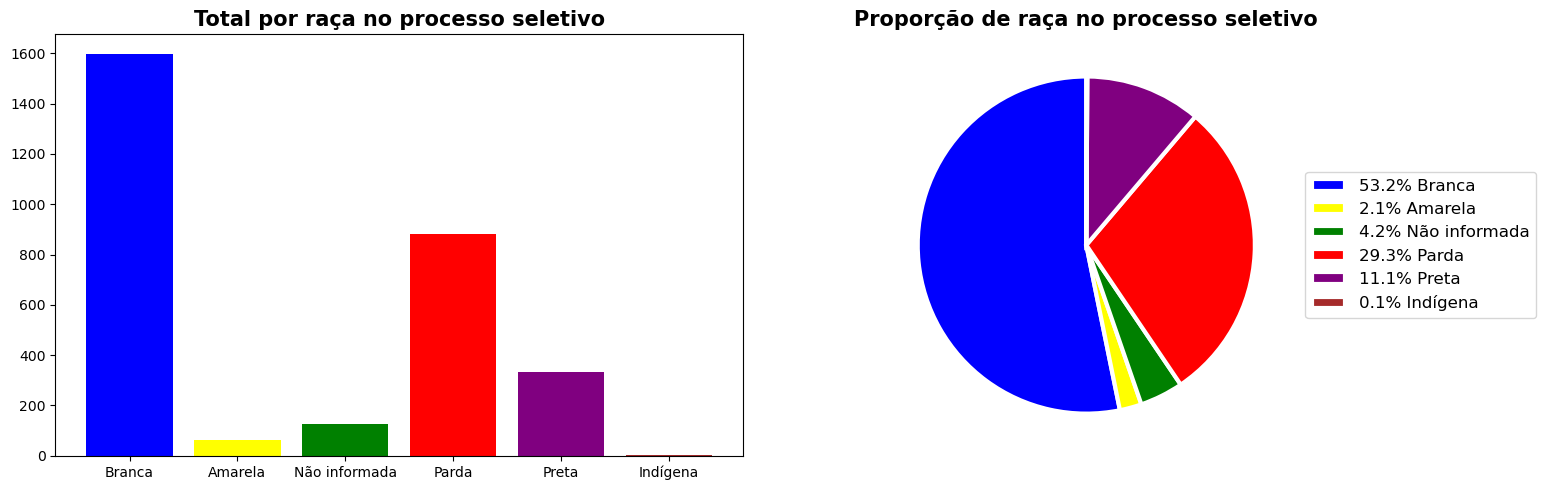

In [41]:
data_raça=data.groupby('Raça-cor')
print(data_raça.groups.keys())
raça_Branca = data_raça.get_group('Branca')
raça_Amarela= data_raça.get_group('Amarela')
raça_Indigena = data_raça.get_group('Indígena')
raça_NI = data_raça.get_group('Não informada')
raça_Parda = data_raça.get_group('Parda')
raça_Preta = data_raça.get_group('Preta')

total_integrantes = len(data)

prct_branca = (len(raça_Branca)*100)/total_integrantes
prct_amarela = (len(raça_Amarela)*100)/total_integrantes
prct_ni = (len(raça_NI)*100)/total_integrantes
prct_parda = (len(raça_Parda)*100)/total_integrantes
prct_preta = (len(raça_Preta)*100)/total_integrantes
prct_indigena = (len(raça_Indigena)*100)/total_integrantes

raças = ['Branca','Amarela','Não informada','Parda','Preta','Indígena']
raças_prct = [f'{prct_branca}% Branca',f'{prct_amarela}% Amarela',f'{round(prct_ni,1)}% Não informada',f'{round(prct_parda,1)}% Parda',f'{prct_preta}% Preta',f'{prct_indigena}% Indígena']
result = [len(raça_Branca),len(raça_Amarela),len(raça_NI),len(raça_Parda),len(raça_Preta),len(raça_Indigena)]

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].bar(raças,result,color=['blue','yellow','green','red','purple','brown'])
ax[0].set_title('Total por raça no processo seletivo',fontsize=15,fontweight='bold')

wedges, texts, autotexts = ax[1].pie(result, labels=raças_prct, autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},colors=['blue','yellow','green','red','purple','brown'])
ax[1].legend(wedges, raças_prct, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),fontsize='large')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(1)   
    x, y = autotext.get_position()
    horizontal_offset = 2* x
    vertical_offset = 2 * y
    autotext.set_position((horizontal_offset, vertical_offset))
    
for text in texts:
    text.set_color('white')
ax[1].set_title('Proporção de raça no processo seletivo',fontsize=15,fontweight='bold')
fig.subplots_adjust()
plt.tight_layout()
plt.show()


